# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Julio Aldrin Purba
- **Email:** juliopurba921@gmail.com
- **ID Dicoding:** julioaldprb]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?
- Bagaimana musim memengaruhi pola peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files

uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


In [3]:
#Load Data Hour
hour_df = pd.read_csv('hour.csv')
hour_df.head()

#Load Data Day
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data dapat di load dengan baik

# Data Hour

In [4]:
#Memeriksa Type Data
hour_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terdapat Type Data yang Tidak Sesuai pada dteday, harusnya tipenya bukan objek melainkan tanggal.

In [5]:
#Memeriksa Missing Values
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [6]:
#Memeriksa Duplicate Data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
#Memeriksa Inacurrate Values
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Data Day

In [8]:
#Memeriksa Type Data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat Type Data yang Tidak Sesuai pada dteday, harusnya tipenya bukan objek melainkan tanggal.

In [9]:
#Memeriksa Missing Values
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
#Memeriksa Duplicate Data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
#Memeriksa Inacurrate Values
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pada Kedua kolom dteday harusnya type data tanggal
- Tidak ada duplikasi data dan missing data, serta tidak ada inacurrate values

### Cleaning Data

# Membersihkan Hour Data

In [12]:
#Konversi Tipe Data dteday
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [13]:
#Cek Ulang Tipe Data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

# Membersihkan Day Data

In [14]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Data objek berhasil diganti menjadi date time


## Exploratory Data Analysis (EDA)

### Explore ...

# A. Analisis Pengaruh Cuaca Terhadap Jumlah Peminjaman Sepeda

1. Agregasi Dasar Berdasarkan Kondisi Cuaca

In [16]:
# Aggregasi data berdasarkan kondisi cuaca (weathersit)
weather_agg = hour_df.groupby('weathersit').agg(
    total_rentals = ('cnt', 'sum'),
    average_rentals = ('cnt', 'mean'),
    median_rentals = ('cnt', 'median'),
    min_rentals = ('cnt', 'min'),
    max_rentals = ('cnt', 'max'),
    count_entries = ('cnt', 'count')
).reset_index()

print("Agregasi Berdasarkan Kondisi Cuaca:")
print(weather_agg)


Agregasi Berdasarkan Kondisi Cuaca:
   weathersit  total_rentals  average_rentals  median_rentals  min_rentals  \
0           1        2338173       204.869272           159.0            1   
1           2         795952       175.165493           133.0            1   
2           3         158331       111.579281            63.0            1   
3           4            223        74.333333            36.0           23   

   max_rentals  count_entries  
0          977          11413  
1          957           4544  
2          891           1419  
3          164              3  


2. Visualisasi Distribusi Menggunakan Boxplot

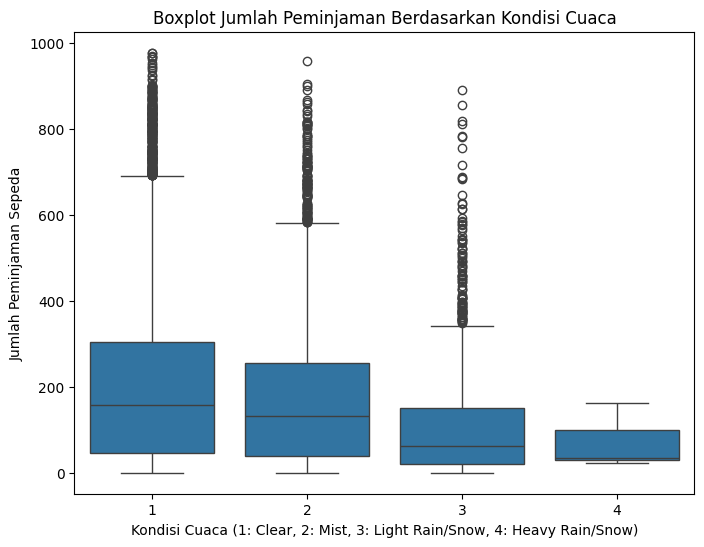

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x='weathersit', y='cnt', data=hour_df)
plt.title("Boxplot Jumlah Peminjaman Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca (1: Clear, 2: Mist, 3: Light Rain/Snow, 4: Heavy Rain/Snow)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.show()


3. Visualisasi Hubungan Variabel Numerik dengan Scatterplot

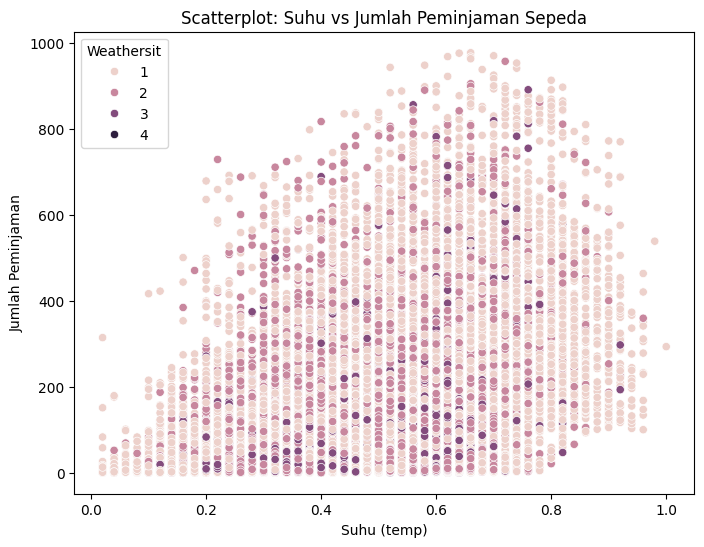

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='temp', y='cnt', hue='weathersit', data=hour_df)
plt.title("Scatterplot: Suhu vs Jumlah Peminjaman Sepeda")
plt.xlabel("Suhu (temp)")
plt.ylabel("Jumlah Peminjaman")
plt.legend(title="Weathersit")
plt.show()


4. Barplot Rata-rata Peminjaman per Kondisi Cuaca

<ipython-input-19-7dafc1946b8b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=hour_df, estimator=np.mean, ci=None)


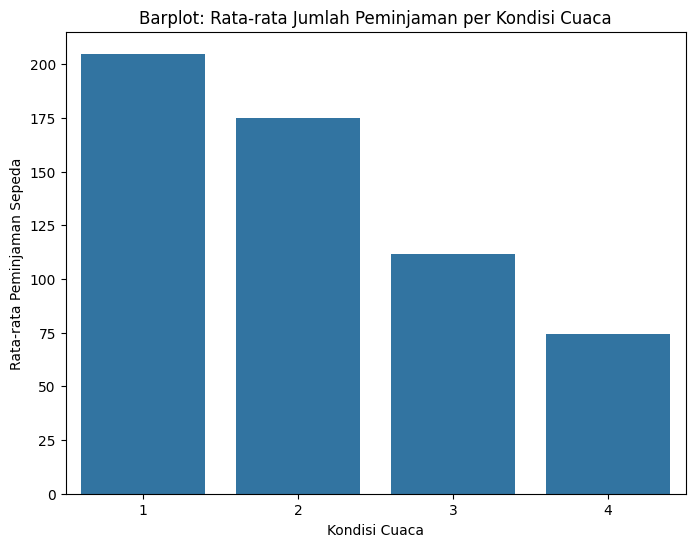

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(x='weathersit', y='cnt', data=hour_df, estimator=np.mean, ci=None)
plt.title("Barplot: Rata-rata Jumlah Peminjaman per Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.show()


# B. Analisis Pengaruh Musim Terhadap Pola Peminjaman Sepeda

1. Mapping Label Musim dan Agregasi

In [20]:
# Mapping label musim (sesuaikan dengan definisi dataset)
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
hour_df['season_label'] = hour_df['season'].map(season_labels)

# Aggregasi data berdasarkan musim
season_agg = hour_df.groupby('season_label').agg(
    total_rentals = ('cnt', 'sum'),
    average_rentals = ('cnt', 'mean'),
    median_rentals = ('cnt', 'median'),
    min_rentals = ('cnt', 'min'),
    max_rentals = ('cnt', 'max'),
    count_entries = ('cnt', 'count')
).reset_index()

print("Agregasi Berdasarkan Musim:")
print(season_agg)


Agregasi Berdasarkan Musim:
  season_label  total_rentals  average_rentals  median_rentals  min_rentals  \
0         Fall        1061129       236.016237           199.0            1   
1       Spring         471348       111.114569            76.0            1   
2       Summer         918589       208.344069           165.0            1   
3       Winter         841613       198.868856           155.5            1   

   max_rentals  count_entries  
0          977           4496  
1          801           4242  
2          957           4409  
3          967           4232  


2. Boxplot Distribusi Peminjaman per Musim

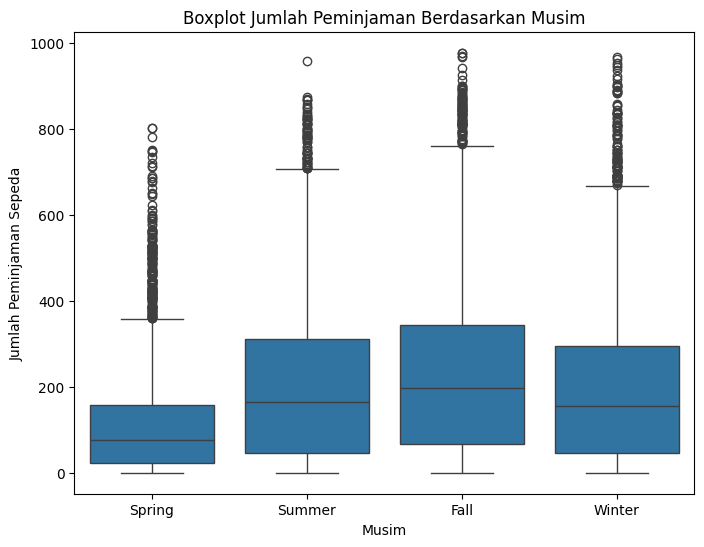

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(x='season_label', y='cnt', data=hour_df)
plt.title("Boxplot Jumlah Peminjaman Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.show()


3. Line Chart Pola Peminjaman per Jam Berdasarkan Musim

<ipython-input-22-f70e143d59fc>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='average_rentals', hue='season_label', data=hourly_season_agg, ci=None)


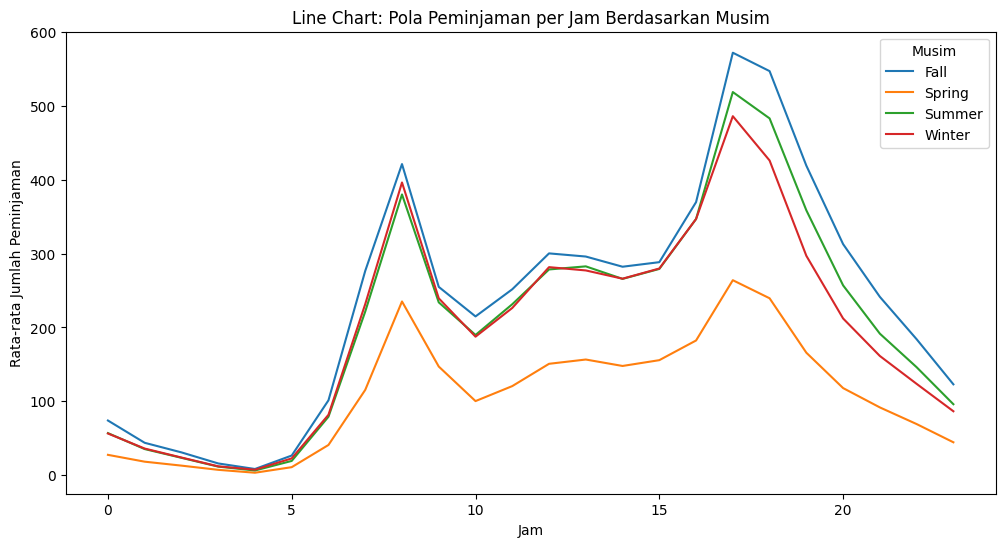

In [22]:
# Aggregasi pola peminjaman per jam berdasarkan musim
hourly_season_agg = hour_df.groupby(['season_label', 'hr']).agg(
    average_rentals = ('cnt', 'mean')
).reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='hr', y='average_rentals', hue='season_label', data=hourly_season_agg, ci=None)
plt.title("Line Chart: Pola Peminjaman per Jam Berdasarkan Musim")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.legend(title="Musim")
plt.show()


4. Scatterplot Hubungan Kelembapan dan Jumlah Peminjaman Berdasarkan Musim

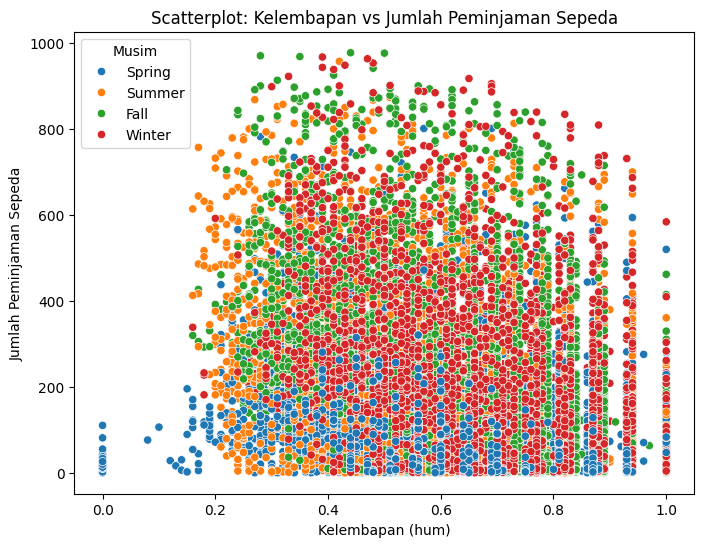

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='hum', y='cnt', hue='season_label', data=hour_df)
plt.title("Scatterplot: Kelembapan vs Jumlah Peminjaman Sepeda")
plt.xlabel("Kelembapan (hum)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.legend(title="Musim")
plt.show()


5. Agregasi dan Visualisasi Gabungan: Kondisi Cuaca & Musim

Agregasi Berdasarkan Kondisi Cuaca dan Musim:
    weathersit season_label  total_rentals  average_rentals  median_rentals  \
0            1         Fall         801941       244.494207           210.0   
1            1       Spring         325278       122.055535            86.0   
2            1       Summer         664463       232.410983           192.0   
3            1       Winter         546491       209.463779           168.0   
4            2         Fall         212932       224.848997           188.0   
5            2       Spring         124205       103.074689            73.0   
6            2       Summer         207363       181.261364           143.0   
7            2       Winter         251452       201.483974           167.0   
8            3         Fall          46256       171.955390           121.0   
9            3       Spring          21642        58.650407            35.0   
10           3       Summer          46763       115.179803            67.5   
11    

<ipython-input-24-7e78884ae8db>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season_label', y='average_rentals', hue='weathersit', data=weather_season_agg, ci=None)


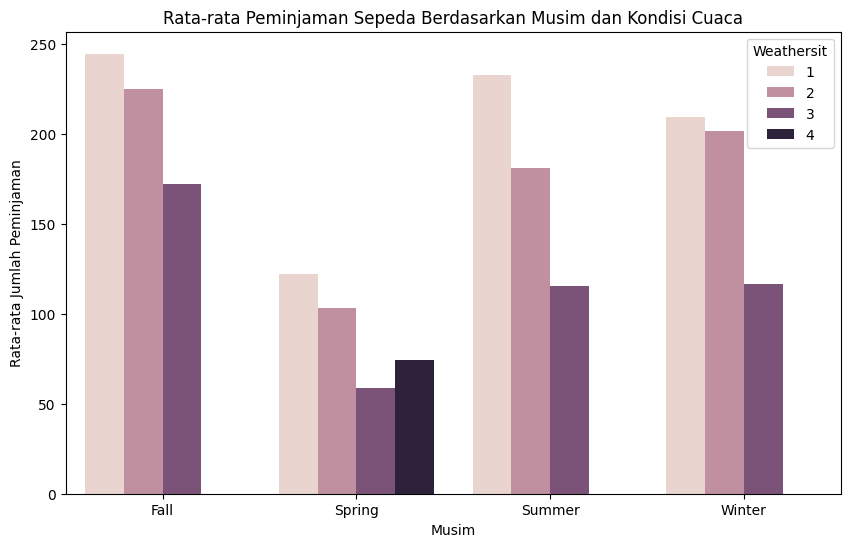

In [24]:
# Aggregasi berdasarkan kombinasi kondisi cuaca dan musim
weather_season_agg = hour_df.groupby(['weathersit', 'season_label']).agg(
    total_rentals = ('cnt','sum'),
    average_rentals = ('cnt','mean'),
    median_rentals = ('cnt','median'),
    count_entries = ('cnt','count')
).reset_index()

print("Agregasi Berdasarkan Kondisi Cuaca dan Musim:")
print(weather_season_agg)

# Visualisasi kombinasi dengan barplot (contoh: rata-rata peminjaman)
plt.figure(figsize=(10,6))
sns.barplot(x='season_label', y='average_rentals', hue='weathersit', data=weather_season_agg, ci=None)
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Musim dan Kondisi Cuaca")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.legend(title="Weathersit")
plt.show()


**Insight:**
- Cuaca yang Baik Mendorong Peminjaman Tinggi:
Kondisi cuaca cerah (weathersit = 1) menghasilkan rata-rata peminjaman yang jauh lebih tinggi, sedangkan kondisi hujan atau salju secara signifikan menurunkan jumlah peminjaman.

- Musim Fall dan Summer Optimal untuk Peminjaman:
Analisis menunjukkan bahwa musim Fall dan Summer memiliki total dan rata-rata peminjaman tertinggi, dengan pola peminjaman yang stabil sepanjang hari, sehingga menjadi periode terbaik untuk operasi dan promosi layanan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?

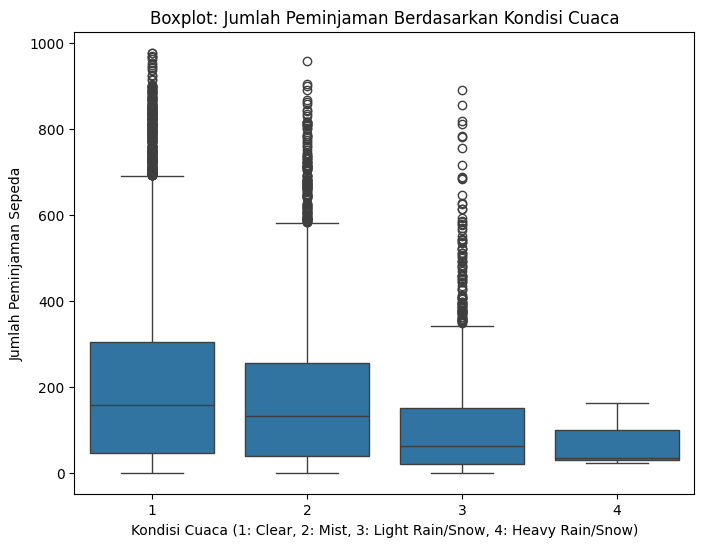

<ipython-input-25-d9b7d944aae0>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=hour_df, estimator=np.mean, ci=None)


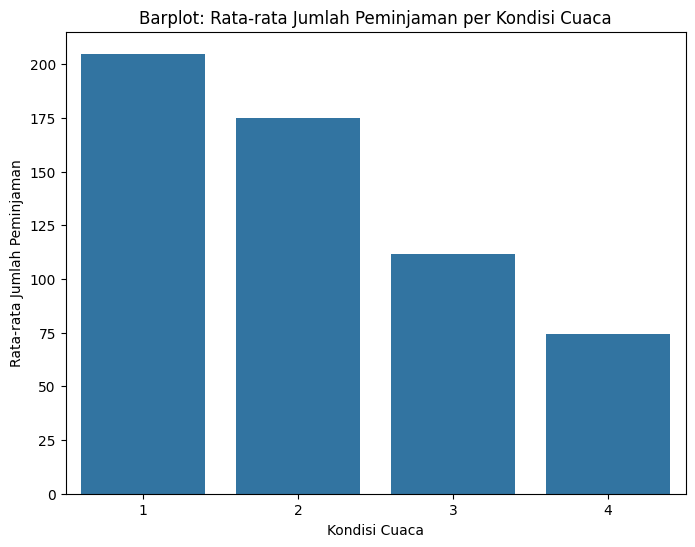

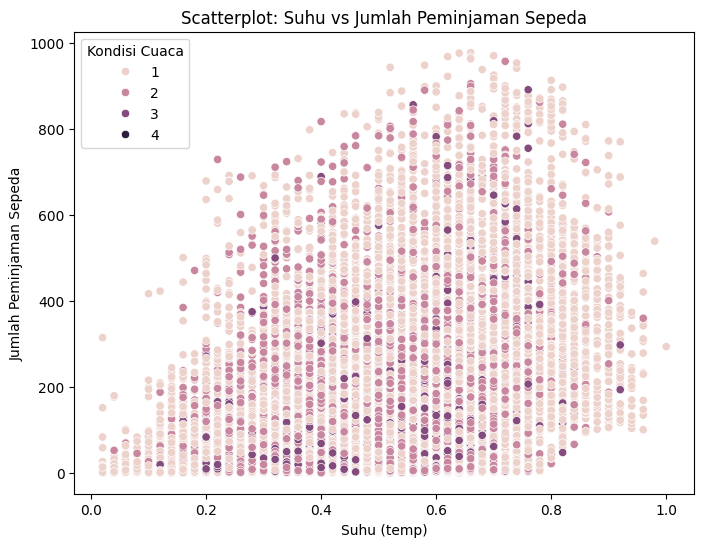

In [25]:
# 1. Boxplot: Distribusi jumlah peminjaman berdasarkan kondisi cuaca
plt.figure(figsize=(8,6))
sns.boxplot(x='weathersit', y='cnt', data=hour_df)
plt.title("Boxplot: Jumlah Peminjaman Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca (1: Clear, 2: Mist, 3: Light Rain/Snow, 4: Heavy Rain/Snow)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.show()

# 2. Barplot: Rata-rata peminjaman per kondisi cuaca
plt.figure(figsize=(8,6))
sns.barplot(x='weathersit', y='cnt', data=hour_df, estimator=np.mean, ci=None)
plt.title("Barplot: Rata-rata Jumlah Peminjaman per Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.show()

# 3. Scatterplot: Hubungan suhu (temp) dengan jumlah peminjaman,
#    diwarnai berdasarkan kondisi cuaca
plt.figure(figsize=(8,6))
sns.scatterplot(x='temp', y='cnt', hue='weathersit', data=hour_df)
plt.title("Scatterplot: Suhu vs Jumlah Peminjaman Sepeda")
plt.xlabel("Suhu (temp)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.legend(title="Kondisi Cuaca")
plt.show()

### Pertanyaan 2:  Bagaimana Musim Memengaruhi Pola Peminjaman Sepeda?

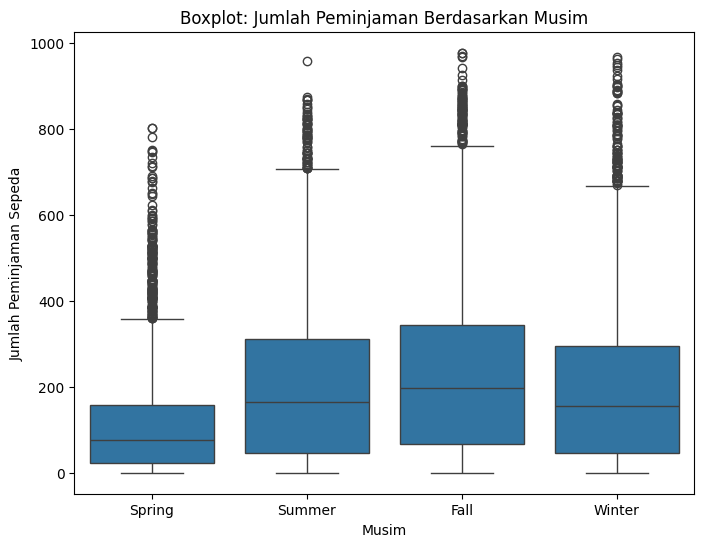

<ipython-input-26-0948dadec693>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='average_rentals', hue='season_label', data=hourly_season_agg, ci=None)


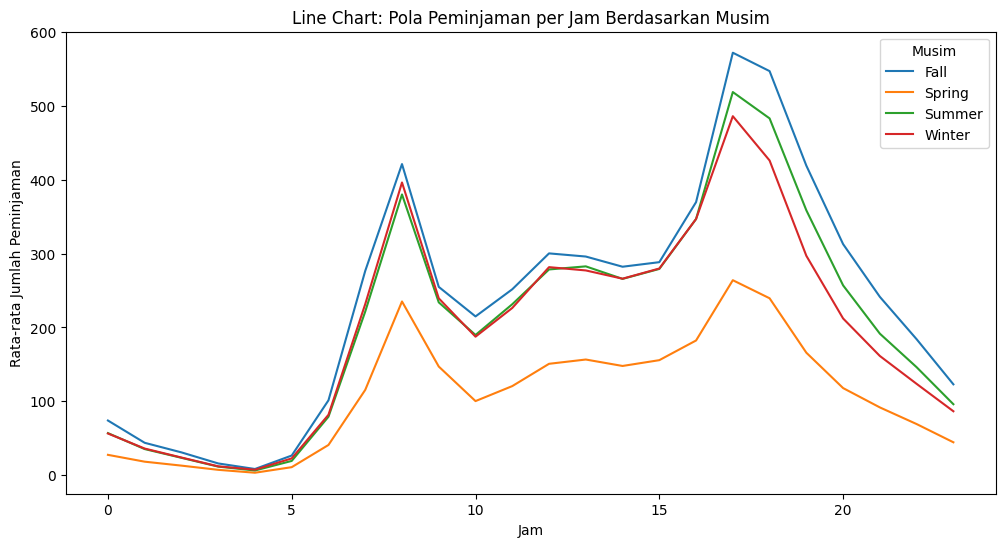

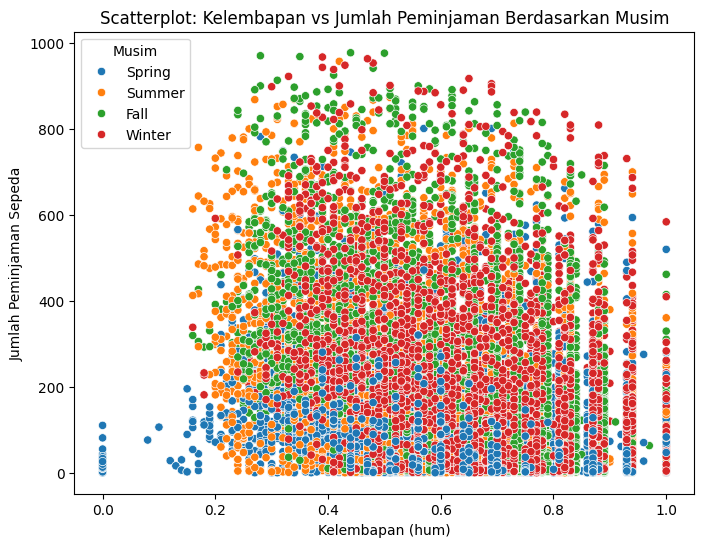

<ipython-input-26-0948dadec693>:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season_label', y='average_rentals', hue='weathersit', data=weather_season_agg, ci=None)


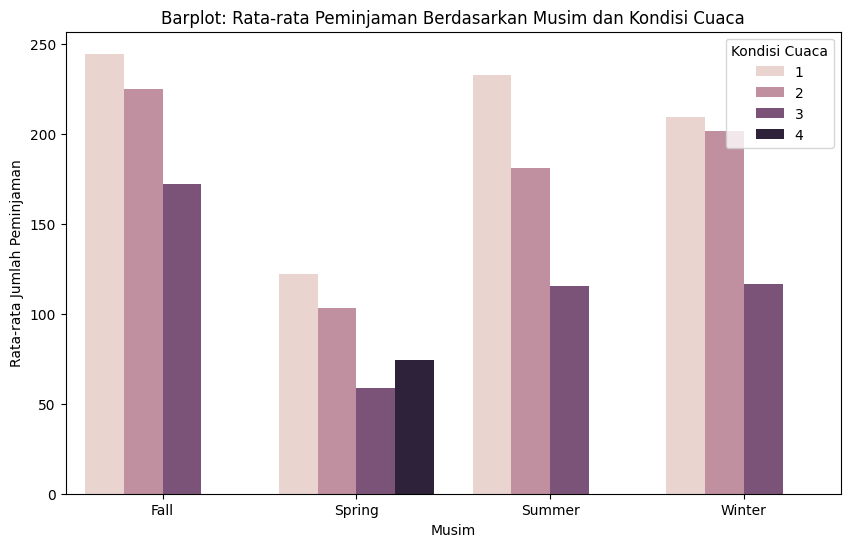

In [26]:
# Pastikan label musim telah dipetakan
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
hour_df['season_label'] = hour_df['season'].map(season_labels)

# 1. Boxplot: Distribusi jumlah peminjaman berdasarkan musim
plt.figure(figsize=(8,6))
sns.boxplot(x='season_label', y='cnt', data=hour_df)
plt.title("Boxplot: Jumlah Peminjaman Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.show()

# 2. Line Chart: Pola peminjaman per jam untuk setiap musim
hourly_season_agg = hour_df.groupby(['season_label', 'hr']).agg(average_rentals=('cnt', 'mean')).reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='hr', y='average_rentals', hue='season_label', data=hourly_season_agg, ci=None)
plt.title("Line Chart: Pola Peminjaman per Jam Berdasarkan Musim")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.legend(title="Musim")
plt.show()

# 3. Scatterplot: Hubungan kelembapan (hum) dengan jumlah peminjaman, berdasarkan musim
plt.figure(figsize=(8,6))
sns.scatterplot(x='hum', y='cnt', hue='season_label', data=hour_df)
plt.title("Scatterplot: Kelembapan vs Jumlah Peminjaman Berdasarkan Musim")
plt.xlabel("Kelembapan (hum)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.legend(title="Musim")
plt.show()

# 4. Barplot: Rata-rata peminjaman berdasarkan kombinasi musim dan kondisi cuaca
weather_season_agg = hour_df.groupby(['weathersit', 'season_label']).agg(average_rentals=('cnt', 'mean')).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='season_label', y='average_rentals', hue='weathersit', data=weather_season_agg, ci=None)
plt.title("Barplot: Rata-rata Peminjaman Berdasarkan Musim dan Kondisi Cuaca")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.legend(title="Kondisi Cuaca")
plt.show()

**Insight:**

Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?

- Boxplot: Distribusi jumlah peminjaman menunjukkan bahwa kondisi cuaca yang lebih baik (clear/sunny) memiliki jumlah peminjaman yang lebih tinggi dibandingkan dengan kondisi hujan atau berkabut. Cuaca buruk (hujan deras/salju) memiliki persebaran jumlah peminjaman yang lebih rendah.
- Barplot: Rata-rata jumlah peminjaman sepeda tertinggi terjadi pada cuaca cerah, dan semakin berkurang saat cuaca menjadi lebih buruk. Ini menunjukkan bahwa pengguna lebih cenderung menggunakan sepeda saat kondisi cuaca mendukung.
- Scatterplot (Suhu vs Peminjaman): Ada hubungan positif antara suhu dan jumlah peminjaman sepeda. Semakin tinggi suhu, semakin banyak jumlah peminjaman sepeda, terutama dalam kondisi cuaca cerah. Namun, pada suhu yang terlalu tinggi, jumlah peminjaman cenderung stabil atau menurun sedikit.

Pertanyaan 2: Bagaimana musim memengaruhi pola peminjaman sepeda?

- Boxplot: Peminjaman sepeda memiliki distribusi yang berbeda pada setiap musim. Musim gugur (Fall) memiliki jumlah peminjaman tertinggi, sedangkan musim semi (Spring) dan musim dingin (Winter) memiliki peminjaman yang lebih rendah.
- Line Chart: Pola peminjaman sepeda per jam menunjukkan bahwa puncak peminjaman terjadi pada pagi dan sore hari di semua musim. Namun, pada musim dingin, jumlah peminjaman di pagi hari lebih rendah dibandingkan musim lainnya, kemungkinan karena suhu yang lebih dingin.
- Scatterplot (Kelembapan vs Peminjaman): Tidak ada korelasi yang terlalu kuat antara kelembapan dan jumlah peminjaman sepeda, tetapi secara umum, saat kelembapan tinggi (hujan atau cuaca lembap), jumlah peminjaman cenderung lebih rendah.
- Barplot (Musim vs Kondisi Cuaca): Kombinasi musim dan kondisi cuaca menunjukkan bahwa peminjaman tertinggi terjadi pada musim panas dengan cuaca cerah, sementara musim dingin dengan cuaca buruk memiliki jumlah peminjaman yang lebih rendah.

## Analisis Lanjutan (Opsional)

## Conclusion

- Berdasarkan analisis dan visualisasi data, dapat disimpulkan bahwa kondisi cuaca sangat berpengaruh terhadap jumlah peminjaman sepeda. Hari-hari dengan cuaca cerah (weathersit = 1) menunjukkan rata-rata peminjaman yang jauh lebih tinggi, sedangkan kondisi hujan atau salju (weathersit 3 dan 4) menyebabkan penurunan tajam dalam peminjaman. Visualisasi seperti boxplot dan scatterplot mengungkapkan hubungan positif antara suhu dan peminjaman, yang menunjukkan bahwa faktor cuaca merupakan elemen krusial dalam menentukan permintaan. Oleh karena itu, strategi operasional dan promosi harus disesuaikan dengan kondisi cuaca untuk mengoptimalkan penggunaan armada sepeda dan meningkatkan kepuasan pelanggan.
- Analisis musiman mengungkapkan bahwa musim memiliki peran penting dalam pola peminjaman sepeda. Data menunjukkan bahwa musim Fall dan Summer mencatat jumlah peminjaman tertinggi dengan pola harian yang stabil, sementara musim Spring cenderung menghasilkan peminjaman yang lebih rendah. Visualisasi melalui line chart per jam dan boxplot memperlihatkan perbedaan tren peminjaman antar musim, yang mengindikasikan perlunya penyesuaian jadwal operasional dan promosi sesuai dengan periode musiman. Dengan memahami variasi ini, pengelola layanan dapat mengoptimalkan alokasi sumber daya, meningkatkan efisiensi operasional, dan merancang strategi pemasaran yang lebih tepat sasaran.









In [27]:
# Load datasets
hour_df = pd.read_csv("hour.csv")
day_df = pd.read_csv("day.csv")

# Convert 'dteday' to datetime format
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Merge datasets on 'dteday'
all_data = pd.merge(hour_df, day_df, on='dteday', suffixes=('_hour', '_day'))

# Save as CSV
all_data.to_csv("all_data.csv", index=False)

# Download the file (for Jupyter Notebook/Colab)
from google.colab import files
files.download("all_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>